In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from torch.utils.data import DataLoader

import seaborn as sns

In [17]:
iris = sns.load_dataset('iris')

data = torch.tensor(iris[iris.columns[0:4]].values).float()

labels = torch.zeros(len(data), dtype=torch.long)
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [4]:
# fake data
fakedata = np.tile(np.array([1, 2, 3, 4]), (10, 1)) + np.tile(10*np.arange(1,11), (4, 1)).T
fakelabels = np.arange(10)>4
print(fakedata)
print(fakelabels)

[[ 11  12  13  14]
 [ 21  22  23  24]
 [ 31  32  33  34]
 [ 41  42  43  44]
 [ 51  52  53  54]
 [ 61  62  63  64]
 [ 71  72  73  74]
 [ 81  82  83  84]
 [ 91  92  93  94]
 [101 102 103 104]]
[False False False False False  True  True  True  True  True]


In [5]:
fakedataLdr = DataLoader(fakedata, shuffle=True)
print(fakedataLdr)
print(fakedataLdr.batch_size)

1


In [6]:
# iterate over data
for i, data in enumerate(fakedataLdr):
    print(i, data.shape, data)

0 torch.Size([1, 4]) tensor([[21, 22, 23, 24]])
1 torch.Size([1, 4]) tensor([[31, 32, 33, 34]])
2 torch.Size([1, 4]) tensor([[81, 82, 83, 84]])
3 torch.Size([1, 4]) tensor([[11, 12, 13, 14]])
4 torch.Size([1, 4]) tensor([[91, 92, 93, 94]])
5 torch.Size([1, 4]) tensor([[101, 102, 103, 104]])
6 torch.Size([1, 4]) tensor([[71, 72, 73, 74]])
7 torch.Size([1, 4]) tensor([[51, 52, 53, 54]])
8 torch.Size([1, 4]) tensor([[41, 42, 43, 44]])
9 torch.Size([1, 4]) tensor([[61, 62, 63, 64]])


In [11]:
fakeDataset = torch.utils.data.TensorDataset(torch.tensor(fakedata), torch.tensor(fakelabels))
#print(fakeDataset.tensors)

fakeDatasetLdr = DataLoader(fakeDataset, shuffle=True)
for dat, lab in fakeDatasetLdr:
    print(dat, lab)

tensor([[81, 82, 83, 84]]) tensor([True])
tensor([[71, 72, 73, 74]]) tensor([True])
tensor([[21, 22, 23, 24]]) tensor([False])
tensor([[51, 52, 53, 54]]) tensor([False])
tensor([[31, 32, 33, 34]]) tensor([False])
tensor([[101, 102, 103, 104]]) tensor([True])
tensor([[91, 92, 93, 94]]) tensor([True])
tensor([[61, 62, 63, 64]]) tensor([True])
tensor([[41, 42, 43, 44]]) tensor([False])
tensor([[11, 12, 13, 14]]) tensor([False])


In [12]:
train_data, test_data, train_labels, test_labels = train_test_split(fakedata, fakelabels, test_size=0.2)

train_data = torch.utils.data.TensorDataset(torch.tensor(train_data), torch.tensor(train_labels))

test_data = torch.utils.data.TensorDataset(torch.tensor(test_data), torch.tensor(test_labels))

train_loader = DataLoader(train_data, batch_size=4, shuffle=True)
test_loader = DataLoader(test_data, batch_size=4, shuffle=True)

In [15]:
print("TRAINING DATA")
for batch, lab in train_loader:
    print(batch, lab) 

print(' ')

print("TEST DATA")
for batch, lab in test_loader:
    print(batch, lab)

TRAINING DATA
tensor([[ 51,  52,  53,  54],
        [101, 102, 103, 104],
        [ 71,  72,  73,  74],
        [ 91,  92,  93,  94]]) tensor([False,  True,  True,  True])
tensor([[61, 62, 63, 64],
        [21, 22, 23, 24],
        [11, 12, 13, 14],
        [81, 82, 83, 84]]) tensor([ True, False, False,  True])
 
TEST DATA
tensor([[41, 42, 43, 44],
        [31, 32, 33, 34]]) tensor([False, False])


# Back to real data 

In [21]:
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.2)

train_data = torch.utils.data.TensorDataset(train_data, train_labels)
test_data = torch.utils.data.TensorDataset(test_data, test_labels)

train_loader = DataLoader(train_data, batch_size=12, shuffle=True)
test_loader = DataLoader(test_data, batch_size=test_data.tensors[0].shape[0])


In [22]:
for x,y in train_loader:
    print(x.shape, y.shape)

torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])
torch.Size([12, 4]) torch.Size([12])


In [25]:
def createANewModel():
    ANNiris = nn.Sequential(
        nn.Linear(4, 64),
        nn.ReLU(),
        nn.Linear(64, 64),
        nn.ReLU(),
        nn.Linear(64, 3)
    )

    # define the loss function
    loss_fn = nn.CrossEntropyLoss()

    # define the optimizer
    learning_rate = 1e-2
    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=learning_rate)
    return ANNiris, loss_fn, optimizer

In [28]:
numepochs = 500

def trainModel():
    trainAcc = []
    testAcc = []

    for epochi in range(numepochs):
        batchAcc = []
        for x, y in train_loader:
            yHat = ANNiris(x)
            loss = loss_fn(yHat, y)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            batchAcc.append((torch.argmax(yHat, dim=1) == y).float().mean())
    

        trainAcc.append(np.mean(batchAcc))

        x,y = next(iter(test_loader))
        predlabels = torch.argmax(ANNiris(x), dim=1)
        testAcc.append((predlabels == y).float().mean())
    return trainAcc, testAcc

# Modeling

In [29]:
ANNiris, loss_fn, optimizer = createANewModel()
trainAcc, testAcc = trainModel()

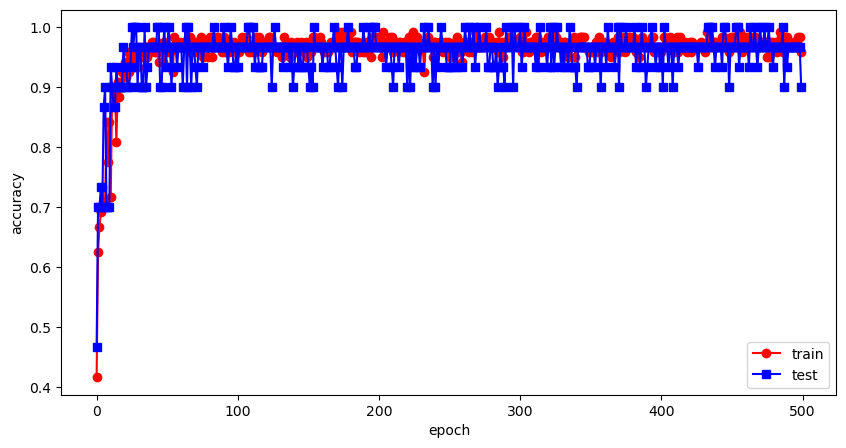

In [30]:
fig = plt.figure(figsize=(10, 5))
plt.plot(trainAcc, 'ro-', label='train')
plt.plot(testAcc, 'bs-', label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()